# Project Machine Learning: Group 25
### Peter Bonnarens, Lennert Franssens & Philip Kukoba

# Sprint 1 : Tabular Data

### Possible tasks:
* Thorough exploratory data analysis, e.g.:
    * Are there substantial price differences between neighbourhoods ?
    * Are there hosts with more than one listing ? How does this impact the price ?
    * What is the correlation between the review score and the price ?
    * ...

    Not enough to just show a plot! Clearly describe WHAT question you investigated, WHY you think this is a relevant question
    and WHAT you deduce/conclude from the results of your data analysis

* Are there outliers ?
* A new Airbnb owner needs to pick an appropriate price:
    * Train a model to predict the price based on a selection of features
    * Find the most similar listings
    
* ...

# Table of work (who did what)

<br>

## Exploratory Data Analysis (EDA)
|                   	| EDA step 1 	| EDA step 2A 	| EDA step 2B 	| EDA step 2C 	| EDA step 2D 	| EDA step 3A 	| EDA step 3B 	|
|:-----------------:	|:----------:	|:-----------:	|:-----------:	|:-----------:	|:-----------:	|:-----------:	|:-----------:	|
|  Peter Bonnarens  	|      X     	|             	|      X      	|             	|             	|             	|             	|
| Lennert Franssens 	|      X     	|      X      	|      X      	|             	|      X      	|      X       	|             	|
|   Philip Kukoba   	|      X     	|             	|             	|      X      	|             	|             	|             	|

<br>

## Linear Regression Model (LR)
|                   	| LR step 1 	| LR step 2 	| LR step 3 	| LR step 4 	|
|:-----------------:	|:---------:	|:---------:	|:---------:	|:---------:	|
|  Peter Bonnarens  	|     X     	|           	|           	|     X     	|
| Lennert Franssens 	|           	|           	|           	|           	|
|   Philip Kukoba   	|           	|           	|           	|           	|

<br>

## K Nearest Neighbors Model (KNN)
|                   	| KNN step 1 	| KNN step 2 	| KNN step 3 	| KNN step 4 	|
|:-----------------:	|:----------:	|:----------:	|:----------:	|:----------:	|
|  Peter Bonnarens  	|            	|            	|            	|            	|
| Lennert Franssens 	|     X      	|     X       	|     X       	|     X      	|
|   Philip Kukoba   	|            	|            	|            	|            	|

# Exploratory Data Analysis (EDA)

## Step 1: imports & loading the dataset

In [1]:
# imports
import numpy as np
import matplotlib.pyplot as plt 

import pandas as pd  
import seaborn as sns 
from matplotlib import rcParams

from sklearn.neighbors import KDTree
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split

# figure size in inches
rcParams['figure.figsize'] = 20,16

%matplotlib inline

# loading the dataset into pandas dataframe
listings = pd.read_csv("data/listings.csv")

## Step 2: preprocessing

Before we can start our EDA, we need to preprocess our data. This means changing string values to integers, removing NaN values, removing garbage data...
Let us first take a look at our dataset.

In [2]:
listings.head()

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,...,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,Unnamed: 74
0,187870,https://www.airbnb.com/rooms/187870,20210716195504,2021-07-16,Luxury studio 'Spiegelhof' in the centre of Ghent,The top floor of our house in the center of Gh...,We live in a quiet and pleasant neighborhood w...,https://a0.muscache.com/pictures/26c46224-795c...,904277,https://www.airbnb.com/users/show/904277,...,4.58,4.85,NaN,t,1,0,1,0,3.61,NaN
1,203806,https://www.airbnb.com/rooms/203806,20210716195504,2021-07-16,Flat close to Sint-Pieters Station!,This well-located and comfortable one-bedroom ...,The house is located in a dead-end street - so...,https://a0.muscache.com/pictures/fe477b7f-93ac...,999847,https://www.airbnb.com/users/show/999847,...,4.49,4.54,NaN,f,2,2,0,0,2.84,NaN
2,204245,https://www.airbnb.com/rooms/204245,20210716195504,2021-07-16,Modern studio's in Ghent centre,<b>The space</b><br />We offer luxury studio's...,NaN,https://a0.muscache.com/pictures/1766072/02965...,1003009,https://www.airbnb.com/users/show/1003009,...,4.97,4.63,NaN,f,2,2,0,0,0.29,NaN
3,216715,https://www.airbnb.com/rooms/216715,20210716195504,2021-07-16,converted loft,Please read full desription for how to get the...,It's close to all that you will want or need v...,https://a0.muscache.com/pictures/1927009/20760...,911466,https://www.airbnb.com/users/show/911466,...,4.89,4.76,NaN,t,1,1,0,0,4.31,NaN
4,252269,https://www.airbnb.com/rooms/252269,20210716195504,2021-07-16,Large & bright town House - Center Ghent - max 8p,"bright, spacious, authentic & beautifully rest...","our neighbourhood is quiet, but nicely vibrati...",https://a0.muscache.com/pictures/69675b54-3e78...,1195314,https://www.airbnb.com/users/show/1195314,...,4.98,4.72,NaN,f,1,1,0,0,2.23,NaN


In [3]:
print(listings.shape)

(923, 75)


Notice that the dataset contains a lot of text values that are not needed for this sprint, and that we start with 923 rows of data and 75 features. The first step is to make a selection of the features we think can be useful or can give us insights.

### 2A : Feature subset selection

Here is a list of the features that we think could possibly be useful during this sprint:
* **id**: (int64) unique identifier for the listing
* **host_id**: (object) unique identifier for the host
* **host_response_time**: (object) description of how long it usually takes the host to respond
* **host_response_rate**: (object) the % rate at which the host responds
* **host_acceptance_rate**: (object) the % rate at which the host accepts booking requests
* **host_total_listings_count**: (int64) The number of listings the host has
* **host_verifications**: (object) array containing the different types of verification methods the host supports
* **host_has_profile_pic**: (object) boolean value that indicates if the host has a profile picture or not
* **host_identity_verified**: (object) boolean value that indicates wether the host is verified or not
* **neighbourhood_cleansed**: (object) the neighbourhood as geocoded using the latitude and longitude
* **latitude**: (object) latitude of listing
* **longitude**: (object) longitude of listing
* **room_type**: (object) room type
* **accomodates**: (object) maximum capacity of the listing
* **bedrooms**: (object) number of bedrooms in the listing
* **beds**: (float64) number of beds
* **price**: (object) daily price in local currency
* **minimum_nights**: (object) minimum number of night stay for the listing
* **maximum_nights**: (int64) maximum number of night stay for the listing
* **number_of_reviews**: (object) the number of reviews the listing has
* **number_of_reviews_ltm**: (int64) the number of reviews the listing has (in the last 12 months)
* **last_review**: (object) the date of the last/newest review
* **review_scores_rating**: (object) overall rating of the listing
* **instant_bookable**: (object) boolean value that indicates wwhether the guest can automatically book the listing without the host requiring to accept their booking request
* **reviews_per_month**: (float64) the number of reviews the listing has over the lifetime of the listing

Some of these features do not have the types we expect them to be. This is due to the fact that there are still NaN/garbage values in the dataset. Some columns also nead to be cast to the correct type. We can check the types of the columns like this:

In [4]:
# filter columns
listings = listings[["id", "host_id", "host_response_time", "host_response_rate", "host_acceptance_rate", "host_total_listings_count", 
    "host_verifications", "host_has_profile_pic","host_identity_verified", "neighbourhood_cleansed", "latitude", "longitude", "room_type",
    "accommodates", "bedrooms", "beds", "price", "minimum_nights", "maximum_nights", "number_of_reviews", "number_of_reviews_ltm", "last_review", "review_scores_rating", "instant_bookable", "reviews_per_month"]]

In [5]:
print(listings.dtypes.to_string())

id                             int64
host_id                       object
host_response_time            object
host_response_rate            object
host_acceptance_rate          object
host_total_listings_count      int64
host_verifications            object
host_has_profile_pic          object
host_identity_verified        object
neighbourhood_cleansed        object
latitude                     float64
longitude                    float64
room_type                     object
accommodates                  object
bedrooms                      object
beds                         float64
price                         object
minimum_nights                object
maximum_nights                 int64
number_of_reviews             object
number_of_reviews_ltm          int64
last_review                   object
review_scores_rating          object
instant_bookable              object
reviews_per_month            float64


### 2B : Shift rows
We noticed that some rows in the dataset contained data that was shifted 1 column to the right starting from the 'host_id' column. Instead of removing these rows from the dataset, we decided to shift these rows 1 column back to the left.

In [6]:
# find lines to shift and add them to a mask - we've found that some lines are shifted 1 to the right beginning on the host_id column (that now contains garbage data)
shifted_lines = listings[pd.to_numeric(listings["host_verifications"], errors='coerce').notnull()].id
mask = listings['id'].isin(shifted_lines)

# shift lines 1 to the left
listings.loc[mask, 'host_id':'reviews_per_month'] = listings.loc[mask, 'host_id':'reviews_per_month'].shift(-1, axis=1)

### 2C : cleaning the data

In [7]:
# first we drop the rows that contain missing values
listings.dropna(inplace=True)

# next we convert some columns to numeric values
listings[["accommodates","bedrooms", "minimum_nights", "number_of_reviews", "review_scores_rating", "longitude", "beds", "host_id", "host_total_listings_count", "maximum_nights", "number_of_reviews_ltm"]] = listings[["accommodates","bedrooms", "minimum_nights", "number_of_reviews", "review_scores_rating", "longitude","beds", "host_id", "host_total_listings_count", "maximum_nights", "number_of_reviews_ltm"]].apply(pd.to_numeric)

In [8]:
# host_response_time
# 0 = best resposne time, 1,2... worse
# listings["host_response_time"].unique()

listings["host_response_time"] = [0 if x == 'within an hour' 
                                    else 1 if x == 'within a few hours' 
                                    else 2 if x == 'within a day' 
                                    else 3 if x == 'a few days or more' 
                                    else None 
                                    for x in listings["host_response_time"]]

#host_response_rate strip trailing % char
listings["host_response_rate"] = listings['host_response_rate'].str.rstrip('%').astype('float') / 100.0

# convert to float
listings['host_acceptance_rate'] = listings['host_acceptance_rate'].str.rstrip('%').astype('float') / 100.0

# convert to number of verification types
listings['host_verifications'] = listings['host_verifications'].apply(eval).apply(lambda x: len(x))

# convert booleans to 1 or 0
listings["host_has_profile_pic"] = listings["host_has_profile_pic"].apply(lambda x: 1 if x == 't' else 0 if x == 'f' else None)
listings["host_identity_verified"] = listings["host_identity_verified"].apply(lambda x: 1 if x == 't' else 0 if x == 'f' else None)
listings["instant_bookable"] = listings["instant_bookable"].apply(lambda x: 1 if x == 't' else 0 if x == 'f' else None)

# convert room types to one-hot encoding
a = pd.get_dummies(listings["room_type"], prefix = "rt")
frames = [listings, a]
listings = pd.concat(frames, axis = 1)
listings.drop(['room_type'], inplace = True, axis = 1)

# convert to float
listings['price'] = listings['price'].replace('[\$,)]', '', regex=True).astype(float)

In [25]:
print(listings.room_type.unique())

['Private room' 'Entire home/apt' 'Hotel room' 'Shared room']


## Step 3 : plots

### 3A : Correlation matrix

<AxesSubplot:>

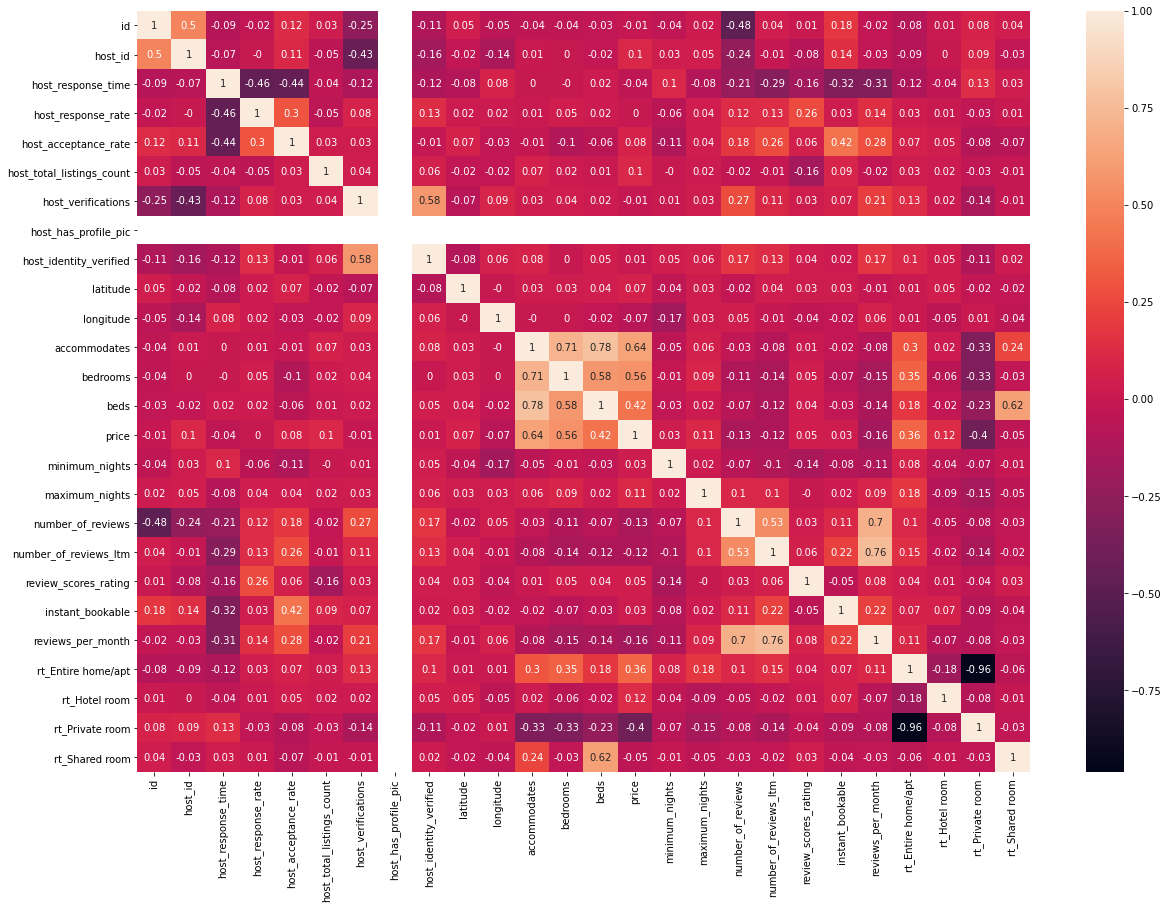

In [10]:
correlation_matrix = listings.corr().round(2)
plt.figure(figsize=(20,14))
sns.heatmap(data=correlation_matrix, annot=True)

### 3B: Distribution and pairplot

D:\Users\Gebruiker\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


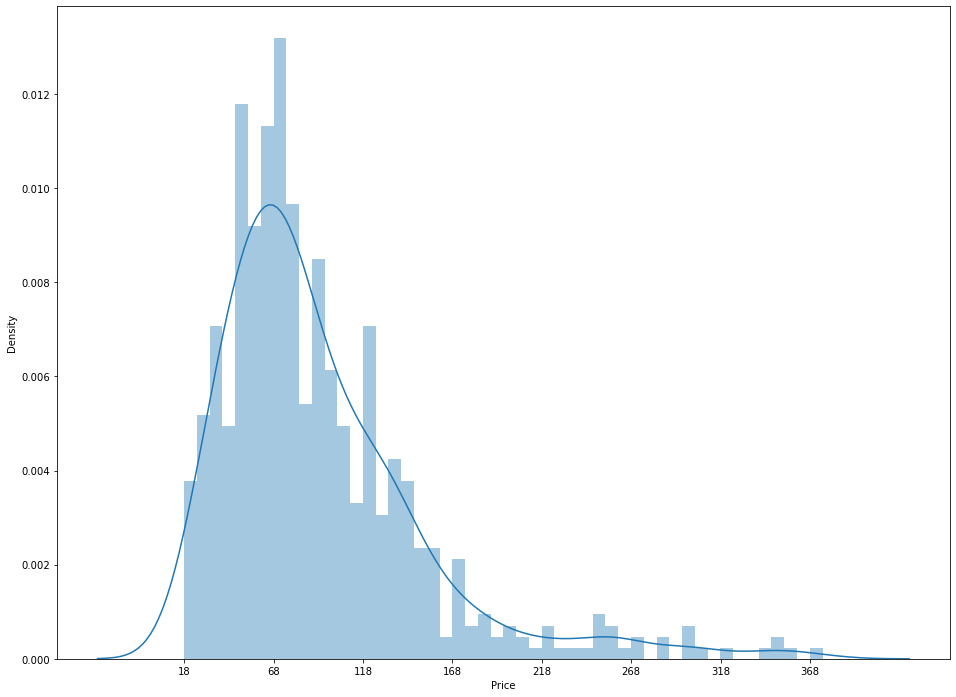

In [32]:
plt.figure(figsize=(16,12))
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

dataset = listings[["price", "neighbourhood_cleansed", "host_response_time", "host_response_rate", "host_acceptance_rate", "host_total_listings_count", "host_verifications", "host_identity_verified", "accommodates", "bedrooms", "beds", "number_of_reviews", "number_of_reviews_ltm", "review_scores_rating", "instant_bookable", "reviews_per_month", "room_type", "rt_Entire home/apt", "rt_Hotel room", "rt_Private room", "rt_Shared room"]]

sns.distplot(dataset.price, bins=50)
plt.xlabel("Price")
plt.xticks(np.arange(min(dataset.price.to_numpy()), max(dataset.price.to_numpy()), 50.0))
plt.show()

# TODO: uncomment (takes up to 3 minutes!!!)
# sns.pairplot(dataset, vars=["price", "host_response_time", "host_response_rate", "host_acceptance_rate", "host_total_listings_count", "host_verifications", "host_identity_verified", "accommodates", "bedrooms", "beds", "number_of_reviews", "number_of_reviews_ltm", "review_scores_rating", "instant_bookable", "reviews_per_month", "room_type", "rt_Entire home/apt", "rt_Hotel room", "rt_Private room", "rt_Shared room"])

# TODO: find some interesting plots
#sns.catplot(x="ca", y="age", kind="swarm", data=dataset, hue="price")
#sns.catplot(x="thal", y="chol", kind="swarm", data=dataset, hue="price")

<AxesSubplot:xlabel='accommodates', ylabel='price'>

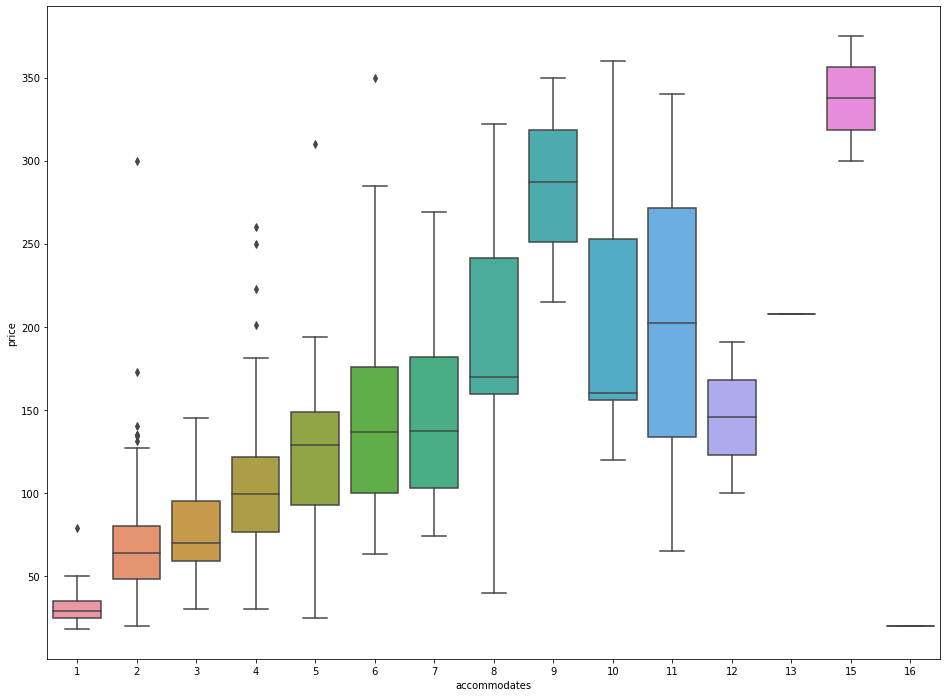

In [34]:
plt.figure(figsize=(16,12))
sns.boxplot(x="accommodates", y="price", data=dataset)

<AxesSubplot:xlabel='room_type', ylabel='price'>

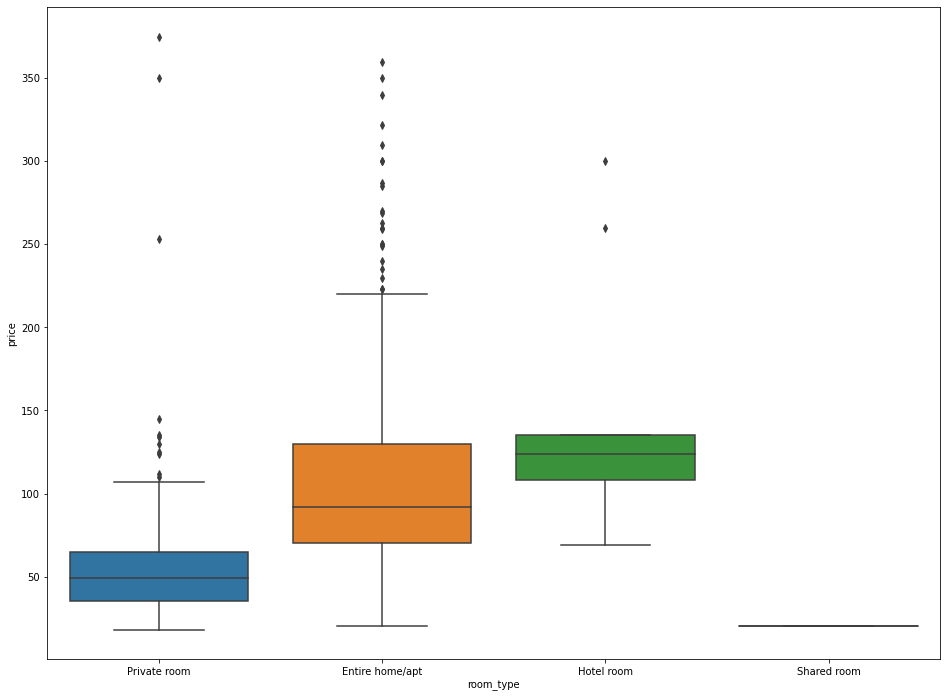

In [35]:
plt.figure(figsize=(16,12))
sns.boxplot(x=dataset.room_type, y=dataset.price)

<AxesSubplot:xlabel='neighbourhood_cleansed', ylabel='price'>

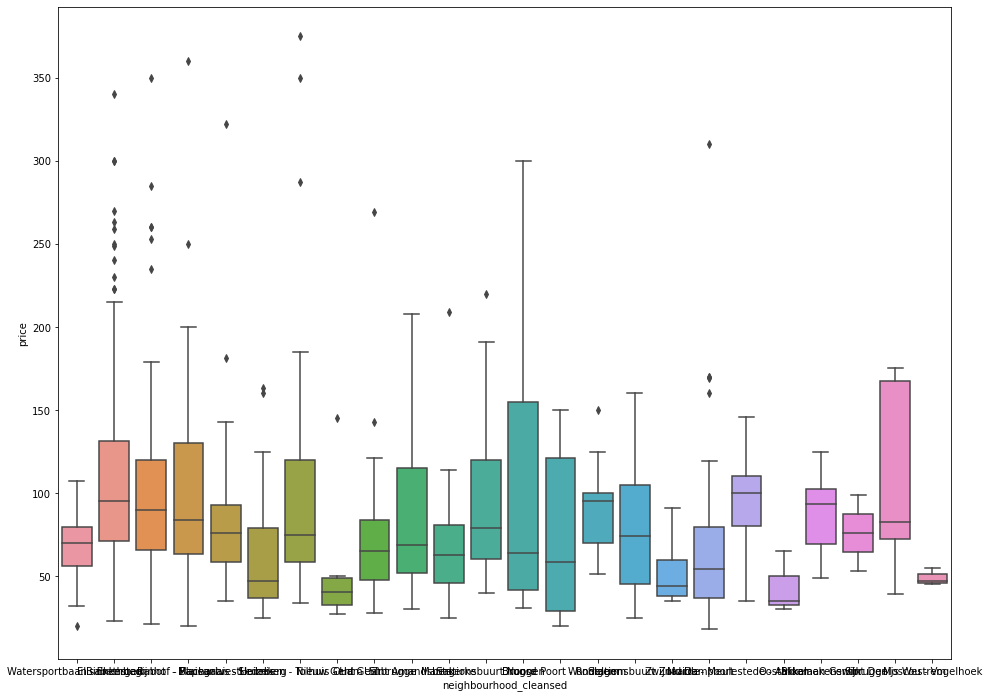

In [36]:
plt.figure(figsize=(16,12))
sns.boxplot(x=dataset.neighbourhood_cleansed, y=dataset.price)

# Linear Regression Model

## Step 1 : Train - Test - Split

In [50]:
from sklearn.model_selection import train_test_split

# TODO: insert chosen features into X
X = pd.concat((), axis=1)
Y = listings["price"]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2)

ValueError: No objects to concatenate

## Step 2: Normalizing the data

In [ ]:
# TODO
# formule: x-xmin/xmax-xmin

## Step 3 : Training the model

In [46]:
from sklearn.linear_model import LinearRegression

lin_model = LinearRegression()
lin_model.fit(X_train, Y_train)

y_train_predict = lin_model.predict(X_train)
y_test_predict = lin_model.predict(X_test)

ValueError: could not convert string to float: 'Entire home/apt'

## Step 4 : Measure the performance of the model

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

# model evaluation for training set
n_train = len(X_train)  # sample size
p_train = len(X_train.columns)  # number of independent variables
R2_train = r2_score(Y_train, y_train_predict)
RMSE_train = (np.sqrt(mean_squared_error(Y_train, y_train_predict)))
# use the adjusted R² score to counter accidental increase of score with number of input features.
adj_R2_train = 1 - ((1-R2_train) * (n_train-1)/(n_train-p_train-1))   #Adj R2 = 1-(1-R2)*(n-1)/(n-p-1)

print("Model train performance")
print("--------------------------------------")
print('RMSE is {}'.format(RMSE_train))
print('R2 score is {}'.format(R2_train))
print('adjusted R2 score is {}'.format(adj_R2_train))
print("\n")

# model evaluation for testing set
n_test = len(X_test)
p_test = len(X_test.columns)
R2_test = r2_score(Y_test, y_test_predict)
RMSE_test = (np.sqrt(mean_squared_error(Y_test, y_test_predict)))
adj_R2_test = 1 - ((1-R2_test) * (n_test-1)/(n_test-p_test-1))   #Adj R2 = 1-(1-R2)*(n-1)/(n-p-1)

print("Model test performance")
print("--------------------------------------")
print('RMSE is {}'.format(RMSE_test))
print('R2 score is {}'.format(R2_test))
print('adjusted R2 score is {}'.format(adj_R2_test))
print("\n")


print("Model parameters")
print("--------------------------------------")
print(lin_model.coef_)
print(lin_model.intercept_)

# Random Forest Regression

## Step 1: Setup

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor

#helper functions

def run_predictions(tree, x):
    predictions = []
    for index, sample in x.iterrows():
        prediction = tree.predict(sample)
        predictions.append(prediction)
    return predictions
    
def visualize_results(predictions, ground_truth):
    
    plt.scatter(ground_truth, predictions, alpha=0.5)
    plt.xlabel("Ground truth price")
    plt.ylabel("Predicted price")
    plt.show()
    
    rmse = (np.sqrt(mean_squared_error(ground_truth, predictions)))
    r2 = r2_score(ground_truth, predictions)
    print('RMSE is {}'.format(rmse))
    print('R2 score is {}'.format(r2))

## Step 2: Split dataset

In [ ]:
#Split dataset in training and test set 
#TODO choose features more wisely

ds_copy=dataset
X = ds_copy.drop(['price'], axis=1)
Y = ds_copy["price"]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 0)


## Step 3: Run random forest regression

In [ ]:
regr = RandomForestRegressor(max_depth=8, random_state=0)
regr.fit(X_train, Y_train)

predictions = regr.predict(X_test)

visualize_results(predictions, Y_test)

It is clear from the RMSE and R2 measurements that the random forest regression does not deliver a good result.

# K Nearest Neighbors Model

## Step 1 : Use one-hot encodings

In [ ]:
# TODO: predict without score values (only initial values can be used for this analysis)
# Replace categorical features with one-hot encodings
a = pd.get_dummies(dataset['host_response_time'], prefix = "hrt")
b = pd.get_dummies(dataset['room_type'], prefix = "rt")

frames = [dataset, a, b]
dataset = pd.concat(frames, axis = 1)

dataset.drop(['host_response_time'], inplace=True, axis=1)
dataset.drop(['room_type'], inplace=True, axis=1)

dataset.head()

## Step 2: Normalizing and splitting the data

In [ ]:
columns = ["host_total_listings_count", "host_verifications", "accommodates", "bedrooms", "beds", "number_of_reviews", "number_of_reviews_ltm", "review_scores_rating", "review_scores_accuracy", "review_scores_cleanliness", "review_scores_checkin", "review_scores_communication", "review_scores_location", "review_scores_value", "calculated_host_listings_count", "calculated_host_listings_count_entire_homes", "calculated_host_listings_count_private_rooms", "calculated_host_listings_count_shared_rooms", "reviews_per_month"]
dataset[columns] = (dataset[columns] - np.min(dataset[columns])) / (np.max(dataset[columns]) - np.min(dataset[columns])).values
dataset.describe()
#dataset.dtypes

# Split data in a training and test set
y = dataset.price.values
x = dataset.drop(['price'], axis = 1)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=0)
print(len(x_train))
print(len(x_test))
print(len(y_train))
print(len(y_test))

## Step 3 : Training the model

In [ ]:
# The algorithm
class MyKNeighborsClassifier:
    def __init__(self, k):
        self.k = k
    def fit(self, x, y):
        self.tree = KDTree(x)
        self.y = y
    def predict(self, x):
        _, ind = self.tree.query(x, k=self.k)
        return self.y[ind].mean(axis=1)


knn = MyKNeighborsClassifier(3)
knn.fit(x_train, y_train)
predictions = knn.predict(x_test)

predictions

## Step 4: Measure the performance of the model

In [ ]:
# TODO: Fix these tests!!! Use the y_test to compare to the predictions values.
#accuracy = (predictions == y_test).mean()

# TODO: Remove outliers (less common listings) - where price > 170
accuracy = np.where((predictions > y_test - 20) & (predictions < y_test + 20), True, False).mean()
print(accuracy)

#TP = (predictions[y_test == 1] == 1).sum()
#print(TP)

#TN = (predictions[y_test == 0] == 0).sum()
#print(TN)

#FP = (predictions[y_test == 1] == 0).sum()
#print(FP)

#FN = (predictions[y_test == 0] == 1).sum()
#print(FN)

#accuracy = (TP+TN)/(TP+TN+FN+FP)
#print(accuracy)

#precision = TP / (TP + FP)
#print(precision)

#recall = TP / (TP + FN)
#print(recall)

#F1 = 2 *  (precision*recall)/(precision+recall)
#print(F1)

#accuracies = []
#for k in range(1, 50):
#    knn = MyKNeighborsClassifier(k)
#    knn.fit(x_train, y_train)
#    predictions = knn.predict(x_test)  > 0.5
#    accuracies.append((predictions == y_test).mean())
#plt.plot(accuracies)


#knn = MyKNeighborsClassifier(5)
#knn.fit(x_train, y_train)
#predictions = knn.predict(x_test)

#fpr, tpr, thresholds = roc_curve(y_test, predictions)
#roc_auc = auc(fpr, tpr)
        
#plt.plot(fpr, tpr, color='darkorange', label='ROC curve (AUC = %0.2f)' % roc_auc)
#plt.plot([0, 1], [0, 1], color='navy', linestyle='--')

#for x, y, txt in zip(fpr, tpr, thresholds):
#    plt.annotate(np.round(txt,2), (x, y-0.04))
    
#plt.xlabel('False Positive Rate')
#plt.ylabel('True Positive Rate')
#plt.title('Receiver operating characteristic')
#plt.legend(loc="lower right")